Задача: нужно предсказать доход человека (больше $50000 или меньше) по результатам переписи населения

https://archive.ics.uci.edu/ml/datasets/Adults

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

### Train data

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 
           'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'capital-gain', 
           'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', 
                 header = None, 
                 names = columns,
                 na_values=' ?')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
print(f'Размер набора данных: {df.shape}')

Размер набора данных: (32561, 15)


Чтобы не было дублирования удаляем столбец `education`, так как у нас есть кол-во лет обучения в толбце `education-num` 

In [6]:
df = df.drop('education', axis = 1)

Также преобразуем столбец `income` в бинарные значения

In [7]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
df['income'] = df['income'].map({' <=50K': 0,
                                 ' >50K' : 1})

In [9]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

у нас есть пустые занчения и так как размер набора данных достаточно большой, можно просто избавиться от них путем удаления

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


### Test data

повторяем манипуляции для этой выборки

In [13]:
test_df = pd.read_csv('adult.test',
                      header = None,
                      names = columns, 
                      na_values = ' ?',
                      skiprows = 1)

In [14]:
print(f'Размер набора данных: {test_df.shape}')

Размер набора данных: (16281, 15)


In [15]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [16]:
test_df = test_df.drop('education', axis = 1)
test_df['income'] = test_df['income'].map({' <=50K.': 0,
                                           ' >50K.' : 1})

In [17]:
test_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [18]:
test_df = test_df.dropna()

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             15060 non-null  int64 
 1   workclass       15060 non-null  object
 2   fnlwgt          15060 non-null  int64 
 3   education-num   15060 non-null  int64 
 4   marital-status  15060 non-null  object
 5   occupation      15060 non-null  object
 6   relationship    15060 non-null  object
 7   race            15060 non-null  object
 8   sex             15060 non-null  object
 9   capital-gain    15060 non-null  int64 
 10  capital-loss    15060 non-null  int64 
 11  hours-per-week  15060 non-null  int64 
 12  native-country  15060 non-null  object
 13  income          15060 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.7+ MB


### Данные

Смотрим на распределение клаасов в итоговой переменной (отклике)

In [20]:
df['income'].value_counts(normalize=True)

income
0    0.751078
1    0.248922
Name: proportion, dtype: float64

видим, что класс `0` преобладает и составляет около 75%, а класс `1` около 25%.

Основываясь на этой информации, можно ссделать вывод, что классы не сбалансироваанны, учитывая это отметим, что метрики
- `Precision` (процент предсказаний 1 среди всех предсказанных 1), `Recall` (процент предсказаных 1 среди всех истинных 1), `F1` (среднее геометрическое precision и recall) - помогут лучше оценить производительность модели на меньшем классе
- `ROC-AUC` - эта метрика учитывает как чувствительность так и специфичность модели
- `Confusion Matrix` - поможет в целом посмотреть на картину предсказаний для каждого класса 

отделяем целевую переменную на тестовых и обучающих данных

In [21]:
X_train = df.drop('income', axis = 1)
y_train = df['income']

X_test = test_df.drop('income', axis = 1)
y_test = test_df['income']

print(f'X_train: {X_train.shape} \ny_train: {y_train.shape}\
       \nX_test: {X_test.shape} \ny_test: {y_test.shape}')

X_train: (30162, 13) 
y_train: (30162,)       
X_test: (15060, 13) 
y_test: (15060,)


In [22]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  -

Обратим внимание на то, что в наборе данных присутвует большое кол-во категориальных признаков и от них нужно избавиться. 

В данном случае над всеми категориальными признаками применим метод `One-Hot-encoding`, в этом методе каждое уникальное значение признака получает свой столбец, который заполняется значениеми: в случае отсутствия уникального значения ставится `0` иначе  `1`.

In [23]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [24]:
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}')

X_train: (30162, 88)
X_test: (15060, 87)


Замечаем, что признаки закодировались не совсем так как мы хотели и мы получили в обучающей выборке 88 признаков, а в тестовой 87. Найдем значение закодированного призака которое не попало в тестовую выборку и из-за чего не создался столбец.

In [25]:
print(set(X_train.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train.columns))

{'native-country_ Holand-Netherlands'}
set()


Теперь можно исправить этот недочет. Создаем полный список всех колонок (из трейна и из теста) и переиндексируем, то есть сделаем так, чтобы столбцы соответствовали столбцам, указанным в списке колонок. Если будут отсутствовать столбцы из columns, они будут добавлены с пропущенными значениями (NaN). В нашем случае это будет столбец "native-country_ Holand-Netherlands".

In [26]:
X_columns = set(X_train.columns) | set(X_test.columns)

X_train = X_train.reindex(columns=X_columns).fillna(0)
X_test = X_test.reindex(columns=X_columns).fillna(0)

In [27]:
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}')
print(set(X_train.columns) == set(X_test.columns))

X_train: (30162, 88)
X_test: (15060, 88)
True


Отметим, что с деревьями стандартизация ничего не улучшает и ничего не уменьшает, поэтому смысла ее делать не много.
кроме всей проделланной предобработки, можно подобавлять новых признаков, которые будут являться, например объединением каких-то значений иных признаков.

### XGBoost

In [28]:
from sklearn.metrics import classification_report #для описания результатов

from xgboost import XGBClassifier

In [29]:
model = XGBClassifier(seed = 42, 
                      n_estimators = 100,
                      max_depth = 6, 
                      learning_rate = 0.3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred_train = model.predict(X_train)
print('train: \n', classification_report(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
print('test: \n', classification_report(y_test, y_pred_test))

train: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     22654
           1       0.84      0.73      0.78      7508

    accuracy                           0.90     30162
   macro avg       0.88      0.84      0.86     30162
weighted avg       0.90      0.90      0.90     30162

test: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     11360
           1       0.77      0.67      0.72      3700

    accuracy                           0.87     15060
   macro avg       0.84      0.80      0.82     15060
weighted avg       0.87      0.87      0.87     15060



### Информативность переменных

In [31]:
import seaborn as sns
import xgboost as xgb

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

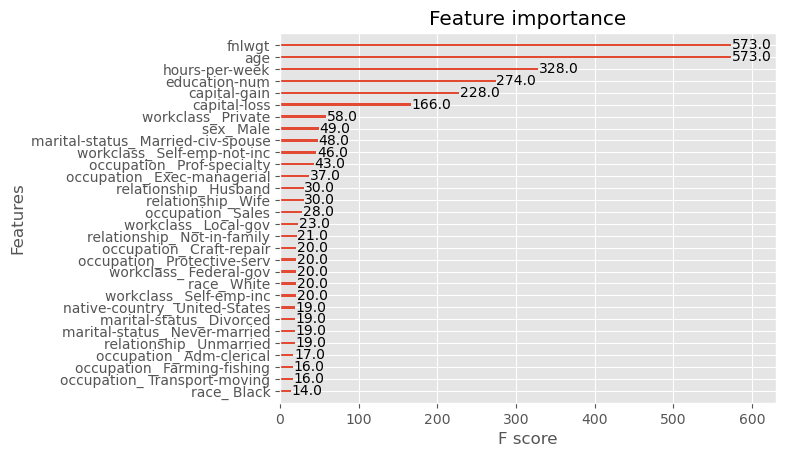

In [32]:
xgb.plot_importance(model, max_num_features = 30)

Чем выше признак, чем больше его f score, тем он информативнее.
Это можно понимать как: побежимся по всем деревьем и посмотрим сколько раз признак использовался для расщепления, чем больше раз, тем она важнее.

Если отбросить долю неинформативных признаков, то на качество на обучающей выборке упадет, но на тестовой вырастет.  

### Параметры xgb

Какие параметры важны, какие не важны и как выбирать правильные значения для важных параметров.

<b>`booster`</b> - определяет тип модели, используемой для бустинга. То есть XGBoost будет состоять из деревьев решений `gbtree` или из каких-то других моделей, например  `gblinear` - Использует линейные модели вместо деревьев - этот вариант может быть полезен для задач, где линейные зависимости более выражены (в плохом случае результат хуже чем у деревьев, в хорошем случае обучение невероятно долгое). `dart` - Это вариант, который добавляет случайность в процесс обучения, что может помочь в борьбе с переобучением. Он использует деревья, как и gbtree, но применяет технику Dropouts, заимствованную из нейронных сетей, что позволяет случайным образом исключать некоторые деревья из процесса предсказания на каждой итерации.

<b>`nthread`</b> - число ядер используемых при вычислении

<b>`eta`</b> - скоркость обучения в методе скорейшего спуска, по умолчанию 0.3, обычно используют значения в интервале 0.01 - 0.2

<b>`min_child_weight`</b> - минимальное значение для суммы весов в узле потомке, по умолчани 1 (слишком маленькое, нужно подбирать). Есть некие правила остановки, одно из них гласит, что если в узле слишком мало наблюдений, то такие узлы должны быть запрещены и для того, чтобы таких узлов не получалось было правило - если у потомка меньше 10 наблюдений, меньше 100 наблюдений, то такого потомка создавать нельзя. Так как у нас в явном видео количество наблюдений попавших в узел отсутствует, то вместо этого правила остановки вводится это ограничение, чтобы не было маленького кол-ва наблюдениий в узле. 

<b>`max_depth`</b> - максимальное число слоев дерева, по умолчанию 6. Предположим, что дерево хорошее и после первого расщепления 2, после второго, например, 4, после третьего 8 и получается дерево достаточно ветвистое и поэтому значение 6 кажется большим, так что нужно подбирать. Чем болььше глуюина, тем больше риск переобучения

<b>`max_leaf_node`</b> - максимальное количество конечных узлов.

<b>`gamma`</b> - запрещает расщепление узла, если заргрязнение потомков уменьшилось менее чем на gamma. Зачение зависит от используемого критерия качества. Надо подбирать используя кросс-валидацию. По умолчанию 0

<b>`subsample`</b> - каждое дерево учится не по всем данным, а только по части. Может учится по части столбцов, по части строк. Передавая значения в этот параметр мы говорим на какой части строк наблюдений обучать наше дерево. 1 - на всех, 0.5 - каждый раз выбирает половину 

<b>`colsample_bytree`</b> - то же самое, что и `subsample` но только по дереву, то есть при каждом расщиплении выбирается своя подвыборка (сильнно замделяет), дефолт 1.

<b>`lambda`</b> - отвечает за L2 регуляризацию (Ridge) - добавляет штраф, помогает уменьшить величину коэффициентов, что может улучшить обобщающую способность модели, особенно в случаях, когда данные имеют высокую размерность или присутствует шум. Надо подбирать используя кросс-валидацию

<b>`alpha`</b> - отвечает за L1 регуляризацию (Lasso) - добавляет штраф к функции потерь, рекомендуется использовать при большом кол-ве признаков, так как лассо обнуляет некоторые коэффициенты, что приводит к отбору признаков и уменьшению сложности модели, дефолт 0.  

<b>`objective`</b> - нужно сказать какая целевая функция (в формуле критерия качества сумма l(y^i, yi)) дефолт `reg:linear`. Чаще всего используются: `binary:logistic` – когда имеется два класса, выходные значения — вероятности принадлежать классу, не код класса. `multi:softmax` – когда имеется больше двух классов, выходные значения — код класса, не вероятности принадлежать классу. Надо еще дополнительно задать num_class — число классов в задаче. `multi:softprob` - когда имеется больше двух классов, выходные значения - вероятности принадлежат классу, не код классаласса.

In [55]:
from sklearn.model_selection import GridSearchCV

In [132]:
greed_param = {'n_estimators' : [100],
               'learning_rate' : [0.1, 0.2, 0.3],
               'min_child_weight' : [1, 3, 6],
               'max_depth' : [3, 4, 5]}

In [133]:
gscv = GridSearchCV(cv = 5,
                    error_score = 'raise',
                    estimator = XGBClassifier(base_score = 0.5, # Начальная оценка для всех прогнозов
                                              colsample_bylevel = 1,  # Доля признаков, используемых для создания каждого уровня дерева (1 - все)
                                              colsample_bytree = 0.8, # Доля признаков, используемых для создания каждого дерева (0.8 - 80%)
                                              gamma = 0, # Минимальная потеря, необходимая для разделения узла (0 - без ограничений)
                                              learning_rate = 0.1, # Скорость обучения (шаг градиентного спуска)
                                              max_delta_step = 0, # Максимальное изменение веса листа для предотвращения переобучения (0 - без ограничений)
                                              max_depth = 3, # Максимальная глубина дерева
                                              min_child_weight = 1, # Минимальная сумма весов всех наблюдений, необходимая в листе дерева
                                              missing = np.nan, # Значение для пропущенных данных
                                              n_estimators = 100, # Количество деревьев в ансамбле.
                                              nthread = -1, # Количество потоков для параллельного выполнения (-1 - все потоки)
                                              objective = 'binary:logistic', # Целевая функция для оптимизации (бинарная логистическая регрессия)
                                              reg_alpha = 0, # Регуляризация L1 (лассо) (0 - отключено)
                                              reg_lambda = 1, # Регуляризация L2 (ридж) (1 - включено)
                                              scale_pos_weight = 1, # Вес положительного класса для балансировки несбалансированных данных
                                              seed = 42, # Метка 
                                              verbosity = 2, # Вывод сообщений (0 - отключен)
                                              subsample = 0.8,), # Доля наблюдений, используемых для создания каждого дерева
                    # n_jobs = -1, # Количество процессоров для параллельного вычисления (-1 - все)
                    param_grid = greed_param, 
                    # pre_dispatch = '2*n_jobs', # Количество задач, которые будут распределены по процессорам (дважды количество рабочих процессов)
                    refit = True, # Указывает, нужно ли переобучить модель на всех данных с лучшими найденными гиперпараметрами.
                    scoring = 'accuracy', 
                    verbose = 2)

In [134]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, min_child_weigh

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=0.5, booster=None,
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learnin...
                                     max_cat_to_onehot=None, max_delta_step=0,
                                     max_depth=3, max_leaves=None,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 6],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=2)

In [135]:
print(f'Лучшие параметры: {gscv.best_params_}')

Лучшие параметры: {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}


In [136]:
gscv_y_pred_test = gscv.predict(X_test)
print(classification_report(y_test, gscv_y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11360
           1       0.78      0.67      0.72      3700

    accuracy                           0.87     15060
   macro avg       0.84      0.80      0.82     15060
weighted avg       0.87      0.87      0.87     15060

